In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np

In [2]:
data_frame_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
data_frame_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
data_frame_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
melted_result_confirmed = pd.melt(
    data_frame_confirmed, 
    id_vars=[
        'Province/State', 
        'Country/Region', 
        'Lat', 
        'Long'
    ], 
    var_name='Date', 
    value_name='Confirmed'
)
melted_result_deaths = pd.melt(data_frame_deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Deaths')
melted_result_recovered = pd.melt(data_frame_recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Recovered')

melted_result_confirmed['Date'] = pd.to_datetime(melted_result_confirmed['Date']).dt.date
melted_result_deaths['Date'] = pd.to_datetime(melted_result_deaths['Date']).dt.date
melted_result_recovered['Date'] = pd.to_datetime(melted_result_recovered['Date']).dt.date

melted_result_confirmed

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0
...,...,...,...,...,...,...
141307,NaN,Vietnam,14.058324,108.277199,2021-06-16,11794
141308,NaN,West Bank and Gaza,31.952200,35.233200,2021-06-16,312164
141309,NaN,Yemen,15.552727,48.516388,2021-06-16,6867
141310,NaN,Zambia,-13.133897,27.849332,2021-06-16,118850


In [4]:
def get_from_day_0(country, days):
    counter_aux = 0
    for key, value in country.iterrows():
        if value['Confirmed'] != 0:
            country.at[key, "Days"] = counter_aux
            counter_aux = counter_aux + 1
            
    country = country[(country["Days"] >= 0)]
    
    if days != 0:
        country = country[:days]
    
    return country

In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
def make_the_day_0_plot(country_1, country_2):
    ax = pp.gca()
    country_1.plot(kind = 'line', x = 'Days', y = 'Confirmed', label = 'Confirmed cases in ' + country_1['Country/Region'].iloc[0], ax=ax)
    country_2.plot(kind = 'line', x = 'Days', y = 'Confirmed', label = 'Confirmed cases in ' + country_2['Country/Region'].iloc[0], ax=ax)
    pp.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3)

In [6]:
# Turn melted_result_confirmed back into pivot table summing up all cases.
# This is needed since the WHO was capturing state/provincial data at beginning but has
# since ceased such level of detail.
melted_result_confirmed = pd.pivot_table(
    melted_result_confirmed, 
    index = [
        'Country/Region',
        'Date',
    ],
    values = [
        'Confirmed'
    ],
    aggfunc = 'sum'
)
melted_result_confirmed

Confirmed
Country/Region Date                 
Afghanistan    2020-01-22          0
               2020-01-23          0
               2020-01-24          0
               2020-01-25          0
               2020-01-26          0
...                              ...
Zimbabwe       2021-06-12      39852
               2021-06-13      39959
               2021-06-14      40077
               2021-06-15      40318
               2021-06-16      40556

[98816 rows x 1 columns]

In [7]:
melted_result_confirmed["Days"] = -1
melted_result_confirmed = melted_result_confirmed.sort_values(['Country/Region', 'Date'])

name_of_country_1 = "Argentina"
name_of_country_2 = "Chile"
#name_of_country_1 = "Argentina"
#name_of_country_2 = "Spain"
# Put 0 if you don't want any limit
days_from_day_0 = 0

country_1 = get_from_day_0( 
    melted_result_confirmed.xs( (name_of_country_1) ), 
    days_from_day_0
)# Get cross section of pivot table before calculating 'Days' value.

country_2 = get_from_day_0( 
    melted_result_confirmed.xs( (name_of_country_2) ), 
    days_from_day_0
)# Get cross section of pivot table before calculating 'Days' value.

In [8]:
country_1['Country/Region'] = name_of_country_1
country_1

,Confirmed,Days,Country/Region
Date,,,
2020-03-03,1,0,Argentina
2020-03-04,1,1,Argentina
2020-03-05,1,2,Argentina
2020-03-06,2,3,Argentina
2020-03-07,8,4,Argentina
...,...,...,...
2021-06-12,4111147,466,Argentina
2021-06-13,4124190,467,Argentina
2021-06-14,4145482,468,Argentina


In [9]:
country_2['Country/Region'] = name_of_country_2
country_2

,Confirmed,Days,Country/Region
Date,,,
2020-02-23,2,0,Chile
2020-02-24,2,1,Chile
2020-02-25,2,2,Chile
2020-02-26,2,3,Chile
2020-02-27,2,4,Chile
...,...,...,...
2021-06-12,1468992,475,Chile
2021-06-13,1476473,476,Chile
2021-06-14,1482663,477,Chile


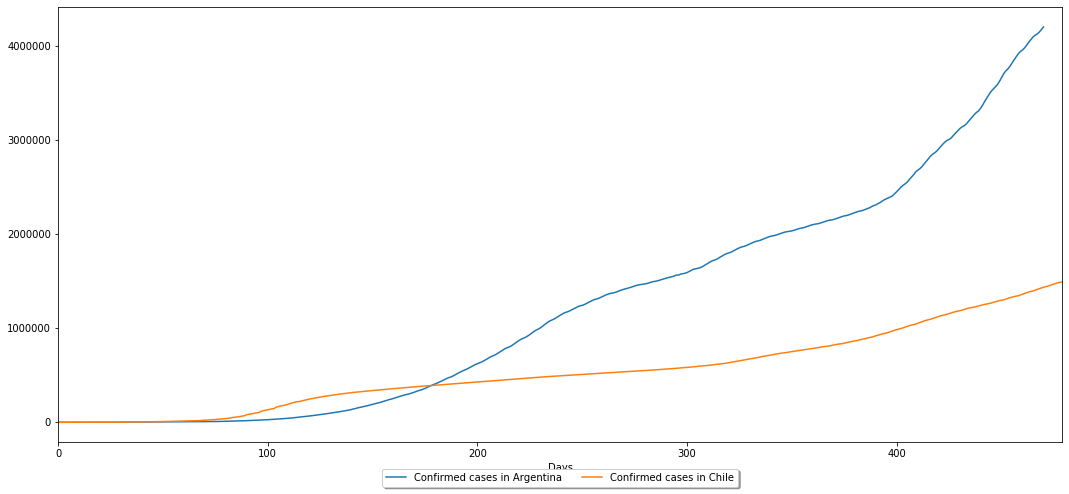

In [10]:
pp.figure(figsize = (18, 8))
make_the_day_0_plot(country_1, country_2)